In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
ls -lah /kaggle/input


In [ ]:
pip -q install nnunetv2 nibabel


In [1]:
!python -c "import nnunetv2; print('nnunetv2 OK')"
!which nnUNetv2_plan_and_preprocess || echo "not found"
!nnUNetv2_plan_and_preprocess -h | head -n 5


nnunetv2 OK
/usr/local/bin/nnUNetv2_plan_and_preprocess
nnUNet_raw is not defined and nnU-Net can only be used on data for which preprocessed files are already present on your system. nnU-Net cannot be used for experiment planning and preprocessing like this. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up properly.
nnUNet_preprocessed is not defined and nnU-Net can not be used for preprocessing or training. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up.
nnUNet_results is not defined and nnU-Net cannot be used for training or inference. If this is not intended behavior, please read documentation/setting_up_paths.md for information on how to set this up.
usage: nnUNetv2_plan_and_preprocess [-h] [-d D [D ...]] [-fpe FPE]
                                    [-npfp NPFP] [--verify_dataset_integrity]


In [2]:
import os, pathlib

os.environ["nnUNet_raw"] = "/kaggle/working/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/kaggle/working/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/kaggle/working/nnUNet_results"

pathlib.Path(os.environ["nnUNet_raw"]).mkdir(parents=True, exist_ok=True)
pathlib.Path(os.environ["nnUNet_preprocessed"]).mkdir(parents=True, exist_ok=True)
pathlib.Path(os.environ["nnUNet_results"]).mkdir(parents=True, exist_ok=True)

print(os.environ["nnUNet_raw"])
print(os.environ["nnUNet_preprocessed"])
print(os.environ["nnUNet_results"])


/kaggle/working/nnUNet_raw
/kaggle/working/nnUNet_preprocessed
/kaggle/working/nnUNet_results


In [3]:
!cp -r /kaggle/input/medikal/nnUNet_raw/* /kaggle/working/nnUNet_raw/
!ls -lah /kaggle/working/nnUNet_raw/Dataset102_BAGLS2D_6K | head


total 492K
drwxr-xr-x 4 root root 4.0K Dec 28 04:28 .
drwxr-xr-x 3 root root 4.0K Dec 28 04:27 ..
-rw-r--r-- 1 root root  162 Dec 28 04:28 dataset.json
drwxr-xr-x 2 root root 252K Dec 28 04:28 imagesTr
drwxr-xr-x 2 root root 228K Dec 28 04:28 labelsTr


In [5]:
import json
from pathlib import Path

ds = Path("/kaggle/working/nnUNet_raw/Dataset102_BAGLS2D_6K/dataset.json")
data = json.loads(ds.read_text())

data["file_ending"] = ".nii"   # <-- kritik fix

ds.write_text(json.dumps(data, indent=2))
print("OK -> file_ending set to", data["file_ending"])


OK -> file_ending set to .nii


In [6]:
!nnUNetv2_plan_and_preprocess -d 102 --verify_dataset_integrity


Fingerprint extraction...
Dataset102_BAGLS2D_6K
Using <class 'nnunetv2.imageio.nibabel_reader_writer.NibabelIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.nibabel_reader_writer.NibabelIO'> as reader/writer
100%|██████████████████████████████████████| 6000/6000 [00:28<00:00, 214.04it/s]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 25, 'patch_size': (256, 512), 'median_image_size_in_voxels': array([256., 512.]), 'spacing': array([1., 1.]), 'normalization_schemes

In [7]:
!nnUNetv2_train 102 2d 0 --npz



############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-12-28 04:41:58.669767: Using torch.compile...
2025-12-28 04:42:00.597154: do_dummy_2d_data_aug: False
2025-12-28 04:42:00.611215: Creating new 5-fold cross-validation split...
2025-12-28 04:42:00.649096: Desired fold for training: 0
2025-12-28 04:42:00.649213: This split has 4800 training a

In [12]:
!find /kaggle/input/medikal -maxdepth 5 -type f | head


/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_000572.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_002751.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_001694.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_002513.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_000039.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_001504.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_000812.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_005264.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_005329.nii
/kaggle/input/medikal/nnUNet_raw/Dataset102_BAGLS2D_6K/labelsTr/case_004057.nii
find: ‘standard output’: Broken pipe
find: write error


In [14]:
!nnUNetv2_predict \
  -i /kaggle/input/testing/nnUNet_raw/Dataset102_BAGLS2D_TEST50/imagesTs \
  -o /kaggle/working/preds_test50 \
  -d 102 -c 2d -f 0



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

Traceback (most recent call last):
  File "/usr/local/bin/nnUNetv2_predict", line 8, in <module>
    sys.exit(predict_entry_point())
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nnunetv2/inference/predict_from_raw_data.py", line 975, in predict_entry_point
    predictor.initialize_from_trained_model_folder(
  File "/usr/local/lib/python3.11/dist-packages/nnunetv2/inference/predict_from_raw_data.py", line 86, in initialize_from_trained_model_folder
    checkpoint = torch.load(join(model_training_output_dir, f'fold_{f}', checkpoint_name),
                

In [16]:
!ls -lah /kaggle/working/nnUNet_results || true
!find /kaggle/working/nnUNet_results -maxdepth 6 -type f -name "*.pth" | head -n 50


total 12K
drwxr-xr-x 3 root root 4.0K Dec 28 04:41 .
drwxr-xr-x 7 root root 4.0K Dec 28 10:08 ..
drwxr-xr-x 3 root root 4.0K Dec 28 04:41 Dataset102_BAGLS2D_6K
/kaggle/working/nnUNet_results/Dataset102_BAGLS2D_6K/nnUNetTrainer__nnUNetPlans__2d/fold_0/checkpoint_latest.pth
/kaggle/working/nnUNet_results/Dataset102_BAGLS2D_6K/nnUNetTrainer__nnUNetPlans__2d/fold_0/checkpoint_best.pth


In [18]:
!find /kaggle/working/nnUNet_results -type f -name "checkpoint_*.pth" | head -n 50


/kaggle/working/nnUNet_results/Dataset102_BAGLS2D_6K/nnUNetTrainer__nnUNetPlans__2d/fold_0/checkpoint_latest.pth
/kaggle/working/nnUNet_results/Dataset102_BAGLS2D_6K/nnUNetTrainer__nnUNetPlans__2d/fold_0/checkpoint_best.pth


In [20]:
!nnUNetv2_predict \
  -i /kaggle/input/testing/nnUNet_raw/Dataset102_BAGLS2D_TEST50/imagesTs \
  -o /kaggle/working/preds_test50 \
  -d 102 -c 2d -f 0 \
  -chk checkpoint_best.pth



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 50 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 50 cases that I would like to predict
Process SpawnProcess-20:
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/nnunetv2/inference/data_iterators.py", line 58, in preprocess_fromfiles_save_to_queue
    raise e
  File "/us

In [21]:
from pathlib import Path
import numpy as np
import nibabel as nib

SRC_DS = Path("/kaggle/input/testing/nnUNet_raw/Dataset102_BAGLS2D_TEST50")
SRC_IMG = SRC_DS / "imagesTs"
SRC_LBL = SRC_DS / "labelsTs"

OUT_DS = Path("/kaggle/working/Test50_fixed3d")
OUT_IMG = OUT_DS / "imagesTs"
OUT_LBL = OUT_DS / "labelsTs"
OUT_IMG.mkdir(parents=True, exist_ok=True)
OUT_LBL.mkdir(parents=True, exist_ok=True)

def fix_nii_to_3d(src: Path, dst: Path):
    nii = nib.load(str(src))
    arr = nii.get_fdata()
    arr = np.asarray(arr)

    # arr: (H,W) ise -> (H,W,1)
    if arr.ndim == 2:
        arr = arr[..., None]
    # arr: (H,W,1) zaten ok
    elif arr.ndim == 3:
        pass
    else:
        raise RuntimeError(f"Unexpected ndim={arr.ndim} for {src.name}")

    # dtype koruma (image için float olabilir, label için int daha iyi ama şimdilik olduğu gibi)
    new = nib.Nifti1Image(arr, affine=nii.affine)
    nib.save(new, str(dst))

# imagesTs
imgs = sorted(SRC_IMG.glob("*.nii*"))
lbls = sorted(SRC_LBL.glob("*.nii*"))

print("Found images:", len(imgs))
print("Found labels:", len(lbls))

for p in imgs:
    fix_nii_to_3d(p, OUT_IMG / p.name)

for p in lbls:
    # label'ı integer yapmak iyi (0/1)
    nii = nib.load(str(p))
    arr = np.asarray(nii.get_fdata())
    if arr.ndim == 2:
        arr = arr[..., None]
    arr = (arr > 0.5).astype(np.uint8)
    nib.save(nib.Nifti1Image(arr, affine=nii.affine), str(OUT_LBL / p.name))

print("Fixed dataset written to:", OUT_DS)


Found images: 50
Found labels: 50
Fixed dataset written to: /kaggle/working/Test50_fixed3d


In [23]:
import nibabel as nib
import numpy as np
from pathlib import Path

p = Path("/kaggle/working/Test50_fixed3d/imagesTs").glob("*.nii*")
p = next(p)
a = np.asarray(nib.load(str(p)).get_fdata())
print("Example shape:", a.shape)


Example shape: (288, 128, 1)


In [24]:
!nnUNetv2_predict \
  -i /kaggle/working/Test50_fixed3d/imagesTs \
  -o /kaggle/working/preds_test50 \
  -d 102 -c 2d -f 0 \
  -chk checkpoint_best.pth



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 50 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 50 cases that I would like to predict

Predicting case_0000:
perform_everything_on_device: True
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]
sending off prediction to background worker for resampling and export
done with case_0000

Predicting case_0001:
perform_everything_on_device: True
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 24.55it/s]
sending off prediction to background worker for resampling and ex

Cases evaluated: 50 Missing preds: 0
Saved CSV: /kaggle/working/results_test50.csv
Saved summary: /kaggle/working/summary_test50.csv


,case,dice,iou,precision,recall,A_gt_px2,A_pred_px2,L_gt_px,L_pred_px,Norm_gt_A_L2,Norm_pred_A_L2,AbsErr_Norm,RelErr_Norm
0,case_0000,0.905512,0.827338,0.950413,0.864662,266,242,108.659039,108.170332,0.022529,0.020682,0.001847,8.198634e-02
1,case_0001,0.969799,0.941368,0.967634,0.971973,892,896,89.442384,91.410894,0.111501,0.107229,0.004272,3.831249e-02
2,case_0002,0.656250,0.488372,0.488372,1.000000,84,172,21.086758,27.044256,0.188912,0.235168,0.046256,2.448548e-01
3,case_0003,0.913580,0.840909,0.848624,0.989305,187,218,40.023078,42.200990,0.116740,0.122408,0.005668,4.855349e-02
4,case_0004,0.977270,0.955549,0.973604,0.980963,3572,3599,201.291426,200.609345,0.088158,0.089429,0.001271,1.442193e-02
5,case_0005,0.000000,0.000000,0.000000,0.000000,0,183,0.000000,47.074220,0.000000,0.082582,0.082582,8.258189e+06
6,case_0006,0.922078,0.855422,0.986111,0.865854,656,576,93.936529,92.961171,0.074342,0.066653,0.007689,1.034294e-01
7,case_0007,0.894131,0.808532,0.919865,0.869797,937,886,94.016096,95.340860,0.106007,0.097471,0.008536,8.052393e-02
8,case_0008,0.900249,0.818594,0.833718,0.978320,369,433,162.995815,167.985881,0.013889,0.015344,0.001455,1.047623e-01
9,case_0009,0.976236,0.953575,0.961552,0.991375,5449,5618,129.433892,128.944834,0.325253,0.337889,0.012636,3.885050e-02


,dice,iou,precision,recall,AbsErr_Norm,RelErr_Norm
mean,0.745506,0.677615,0.743797,0.763160,0.020848,1.651652e+05
std,0.337023,0.319906,0.346697,0.348173,0.057203,1.167884e+06
median,0.877169,0.781212,0.912106,0.901015,0.005778,5.894232e-02


In [30]:
import random
import numpy as np
from pathlib import Path
import nibabel as nib
import cv2

IMG_DIR  = Path("/kaggle/working/Test50_fixed3d/imagesTs")
GT_DIR   = Path("/kaggle/working/Test50_fixed3d/labelsTs")
PRED_DIR = Path("/kaggle/working/preds_test50")
OUT_DIR  = Path("/kaggle/working/overlays_test50")
OUT_DIR.mkdir(parents=True, exist_ok=True)

def load_2d(p):
    arr = nib.load(str(p)).get_fdata()
    return np.squeeze(arr)

def norm_img(x):
    x = x.astype(np.float32)
    x = (x - x.min()) / (x.max() - x.min() + 1e-8)
    return (x * 255).astype(np.uint8)

# case list GT üzerinden alınır (en güvenlisi)
cases = sorted([p.stem for p in GT_DIR.glob("*.nii*")])

random.seed(42)
pick = random.sample(cases, k=min(10, len(cases)))

print("Selected cases:", pick)

for c in pick:
    # image dosyası _0000 ile
    img_p  = next(IMG_DIR.glob(c + "_0000.*"))
    gt_p   = next(GT_DIR.glob(c + ".*"))
    pred_p = next(PRED_DIR.glob(c + ".*"))

    img = norm_img(load_2d(img_p))
    gt  = (load_2d(gt_p) > 0.5).astype(np.uint8)
    pr  = (load_2d(pred_p) > 0.5).astype(np.uint8)

    # kontur çıkar
    gt_cnt, _ = cv2.findContours(gt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    pr_cnt, _ = cv2.findContours(pr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    canvas = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(canvas, gt_cnt, -1, (0,255,0), 2)   # GT = yeşil
    cv2.drawContours(canvas, pr_cnt, -1, (0,0,255), 2)   # Pred = kırmızı

    cv2.imwrite(str(OUT_DIR / f"{c}.png"), canvas)

print("Overlay images saved to:", OUT_DIR)
print("Example files:", sorted([p.name for p in OUT_DIR.glob("*.png")])[:5])


Selected cases: ['case_0040', 'case_0007', 'case_0001', 'case_0017', 'case_0015', 'case_0014', 'case_0008', 'case_0006', 'case_0034', 'case_0005']
Overlay images saved to: /kaggle/working/overlays_test50
Example files: ['case_0001.png', 'case_0005.png', 'case_0006.png', 'case_0007.png', 'case_0008.png']


In [32]:
!zip -r /kaggle/working/overlays_test50.zip /kaggle/working/overlays_test50 > /dev/null
!ls -lah /kaggle/working/overlays_test50.zip


-rw-r--r-- 1 root root 606K Dec 28 10:29 /kaggle/working/overlays_test50.zip


In [34]:
import pandas as pd

df = pd.read_csv("/kaggle/working/results_test50.csv")
print("WORST 5 by Dice:")
print(df.sort_values("dice").head(5)[["case","dice","iou","precision","recall","RelErr_Norm"]])

print("\nBEST 5 by Dice:")
print(df.sort_values("dice", ascending=False).head(5)[["case","dice","iou","precision","recall","RelErr_Norm"]])


WORST 5 by Dice:
         case  dice  iou  precision  recall   RelErr_Norm
5   case_0005   0.0  0.0        0.0     0.0  8.258189e+06
11  case_0011   0.0  0.0        0.0     0.0  0.000000e+00
20  case_0020   0.0  0.0        0.0     0.0  0.000000e+00
19  case_0019   0.0  0.0        0.0     0.0  0.000000e+00
31  case_0031   0.0  0.0        0.0     0.0  0.000000e+00

BEST 5 by Dice:
         case      dice       iou  precision    recall  RelErr_Norm
27  case_0027  0.984557  0.969583   0.971625  0.997837     0.021732
34  case_0034  0.979183  0.959215   0.962121  0.996860     0.018334
26  case_0026  0.978261  0.957447   0.974409  0.982143     0.034131
4   case_0004  0.977270  0.955549   0.973604  0.980963     0.014422
9   case_0009  0.976236  0.953575   0.961552  0.991375     0.038850


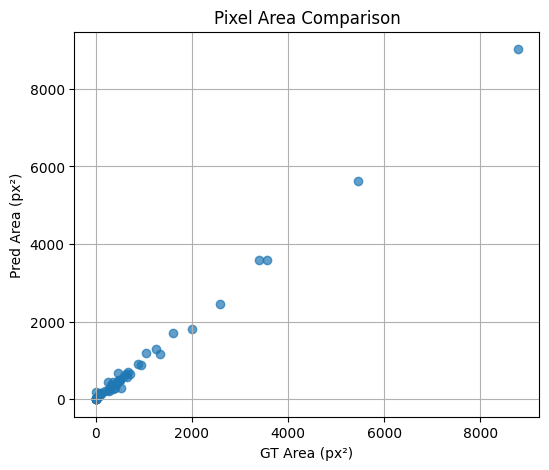

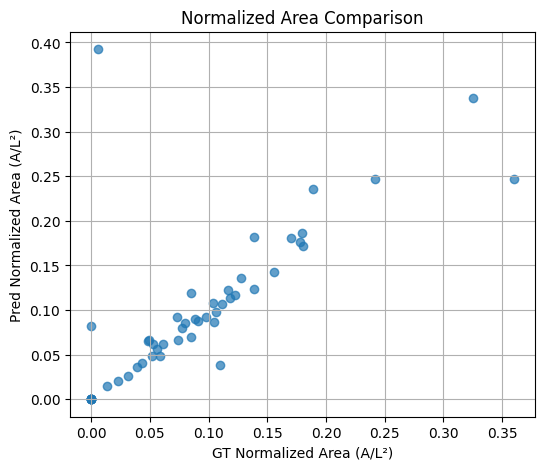

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/working/results_test50.csv")

# --- Pixel Area ---
plt.figure(figsize=(6,5))
plt.scatter(df["A_gt_px2"], df["A_pred_px2"], alpha=0.7)
plt.xlabel("GT Area (px²)")
plt.ylabel("Pred Area (px²)")
plt.title("Pixel Area Comparison")
plt.grid(True)

plt.savefig("/kaggle/working/pixel_area_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Normalized Area ---
plt.figure(figsize=(6,5))
plt.scatter(df["Norm_gt_A_L2"], df["Norm_pred_A_L2"], alpha=0.7)
plt.xlabel("GT Normalized Area (A/L²)")
plt.ylabel("Pred Normalized Area (A/L²)")
plt.title("Normalized Area Comparison")
plt.grid(True)

plt.savefig("/kaggle/working/normalized_area_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


In [40]:
import pandas as pd

df = pd.read_csv("/kaggle/working/results_test50.csv")
bad = ["case_0005","case_0011","case_0020","case_0019","case_0031"]
print(df[df["case"].isin(bad)][["case","dice","A_gt_px2","A_pred_px2","L_gt_px","L_pred_px","Norm_gt_A_L2","Norm_pred_A_L2"]])


         case  dice  A_gt_px2  A_pred_px2  L_gt_px  L_pred_px  Norm_gt_A_L2  \
5   case_0005   0.0         0         183      0.0   47.07422           0.0   
11  case_0011   0.0         0           0      0.0    0.00000           0.0   
19  case_0019   0.0         0           0      0.0    0.00000           0.0   
20  case_0020   0.0         0           0      0.0    0.00000           0.0   
31  case_0031   0.0         0           0      0.0    0.00000           0.0   

    Norm_pred_A_L2  
5         0.082582  
11        0.000000  
19        0.000000  
20        0.000000  
31        0.000000  


In [42]:
import pandas as pd

df = pd.read_csv("/kaggle/working/results_test50.csv")

neg = df[df["A_gt_px2"] == 0].copy()
pos = df[df["A_gt_px2"] > 0].copy()

print("Total cases:", len(df))
print("Negative GT cases (A_gt=0):", len(neg))
print("Positive GT cases (A_gt>0):", len(pos))

# Negatiflerde FP var mı?
fp_neg = neg[neg["A_pred_px2"] > 0]
print("\nNegative cases with false positives:", len(fp_neg))
print(fp_neg[["case","A_pred_px2","L_pred_px","Norm_pred_A_L2"]].head(20))

# Pozitiflerde metrik özet (asıl segmentation performansı)
summary_pos = pos[["dice","iou","precision","recall","AbsErr_Norm","RelErr_Norm"]].agg(["mean","std","median"])
print("\nSUMMARY (POSITIVE ONLY):")
display(summary_pos)


Total cases: 50
Negative GT cases (A_gt=0): 8
Positive GT cases (A_gt>0): 42

Negative cases with false positives: 1
        case  A_pred_px2  L_pred_px  Norm_pred_A_L2
5  case_0005         183   47.07422        0.082582

SUMMARY (POSITIVE ONLY):


,dice,iou,precision,recall,AbsErr_Norm,RelErr_Norm
mean,0.887507,0.806685,0.885473,0.908524,0.022853,1.636731
std,0.081524,0.125103,0.123056,0.097929,0.061150,9.781258
median,0.902881,0.822966,0.934286,0.948295,0.006914,0.077074


In [44]:
from pathlib import Path
import numpy as np
import nibabel as nib
import cv2

# 1) JPG yolu (senin input dataset adın: denemergb)
jpg_path = Path("/kaggle/input/denemergb")  # dataset klasörü
jpg_files = list(jpg_path.glob("*.jpg")) + list(jpg_path.glob("*.jpeg")) + list(jpg_path.glob("*.png"))

assert len(jpg_files) > 0, "Input klasöründe jpg/png bulamadım."
img_file = jpg_files[0]
print("Using image:", img_file)

# 2) Görüntüyü oku ve GRAY'e çevir
bgr = cv2.imread(str(img_file), cv2.IMREAD_COLOR)
assert bgr is not None, "Görüntü okunamadı."
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)  # (H,W) uint8

# 3) nnU-Net beklediği gibi (H,W,1) yap
arr = gray.astype(np.float32)[..., None]  # (H,W,1)

# 4) NIfTI kaydet (affine identity yeter)
out_ds = Path("/kaggle/working/single_case_infer")
in_dir = out_ds / "imagesTs"
in_dir.mkdir(parents=True, exist_ok=True)

case_id = "case_doc_0000"  # nnU-Net standardı: _0000 = kanal 0
nii_path = in_dir / f"{case_id}.nii"
nib.save(nib.Nifti1Image(arr, affine=np.eye(4)), str(nii_path))

print("Saved NIfTI to:", nii_path)
print("Shape:", arr.shape, "dtype:", arr.dtype, "min/max:", float(arr.min()), float(arr.max()))


Using image: /kaggle/input/denemergb/fe6ad8b8e0b6e0d7ed9ea21e7a8afada.jpg
Saved NIfTI to: /kaggle/working/single_case_infer/imagesTs/case_doc_0000.nii
Shape: (204, 261, 1) dtype: float32 min/max: 0.0 255.0


In [45]:
!nnUNetv2_predict \
  -i /kaggle/working/single_case_infer/imagesTs \
  -o /kaggle/working/single_case_pred \
  -d 102 -c 2d -f 0 \
  -chk checkpoint_best.pth



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting case_doc:
perform_everything_on_device: True
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
sending off prediction to background worker for resampling and export
done with case_doc


In [51]:
from pathlib import Path
import numpy as np
import nibabel as nib
import cv2

PRED_DIR = Path("/kaggle/working/single_case_pred")
IN_DIR   = Path("/kaggle/working/single_case_infer/imagesTs")

# pred dosyasını otomatik bul (ilk .nii / .nii.gz)
pred_files = sorted(list(PRED_DIR.glob("*.nii")) + list(PRED_DIR.glob("*.nii.gz")))
assert len(pred_files) > 0, f"Pred klasöründe nii bulunamadı: {PRED_DIR}"
pred_path = pred_files[0]

# input image dosyasını otomatik bul
img_files = sorted(list(IN_DIR.glob("*.nii")) + list(IN_DIR.glob("*.nii.gz")))
assert len(img_files) > 0, f"Input klasöründe nii bulunamadı: {IN_DIR}"
img_path = img_files[0]

print("Using pred:", pred_path.name)
print("Using img :", img_path.name)

pred = np.squeeze(nib.load(str(pred_path)).get_fdata())
img  = np.squeeze(nib.load(str(img_path)).get_fdata())

mask = (pred > 0.5).astype(np.uint8)

# A (px^2)
A = int(mask.sum())

# PCA ile L (px)
def pca_length(binary_mask):
    ys, xs = np.where(binary_mask > 0)
    if len(xs) < 10:
        return 0.0
    pts = np.stack([xs, ys], axis=1).astype(np.float64)
    pts -= pts.mean(axis=0, keepdims=True)
    cov = np.cov(pts.T)
    vals, vecs = np.linalg.eigh(cov)
    v = vecs[:, np.argmax(vals)]
    proj = pts @ v
    return float(proj.max() - proj.min())

L = pca_length(mask)
Norm = A / (L**2 + 1e-8) if L > 0 else 0.0

print("\n=== RESULTS (Doctor image) ===")
print("Area A (px^2):", A)
print("Length L (px):", L)
print("Normalized A/L^2:", Norm)

# Overlay (pred kontur)
def norm_img(x):
    x = x.astype(np.float32)
    x = (x - x.min()) / (x.max() - x.min() + 1e-8)
    return (x * 255).astype(np.uint8)

canvas = cv2.cvtColor(norm_img(img), cv2.COLOR_GRAY2BGR)
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(canvas, cnts, -1, (0,0,255), 2)

out_png = Path("/kaggle/working/doctor_overlay.png")
cv2.imwrite(str(out_png), canvas)
print("Saved overlay:", out_png)


Using pred: case_doc.nii
Using img : case_doc_0000.nii

=== RESULTS (Doctor image) ===
Area A (px^2): 66
Length L (px): 41.84649938383114
Normalized A/L^2: 0.037689959307439805
Saved overlay: /kaggle/working/doctor_overlay.png


Saved: /kaggle/working/doctor_overlay_contour.png
Saved: /kaggle/working/doctor_overlay_mask.png


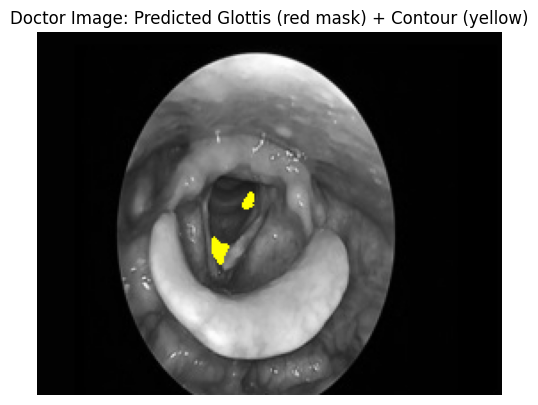

In [53]:
import numpy as np
from pathlib import Path
import nibabel as nib
import cv2
import matplotlib.pyplot as plt

PRED = Path("/kaggle/working/single_case_pred/case_doc.nii")
IMG  = Path("/kaggle/working/single_case_infer/imagesTs/case_doc_0000.nii")

pred = np.squeeze(nib.load(str(PRED)).get_fdata())
img  = np.squeeze(nib.load(str(IMG)).get_fdata())

mask = (pred > 0.5).astype(np.uint8)

# görüntüyü 0-255'e normalize et
x = img.astype(np.float32)
x = (x - x.min()) / (x.max() - x.min() + 1e-8)
gray8 = (x * 255).astype(np.uint8)

base = cv2.cvtColor(gray8, cv2.COLOR_GRAY2BGR)

# kontur
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
overlay_contour = base.copy()
cv2.drawContours(overlay_contour, cnts, -1, (0, 255, 255), 2)  # sarı kontur (BGR)

# şeffaf maske (kırmızı)
overlay_mask = base.copy()
red = np.zeros_like(base)
red[..., 2] = 255  # R channel

alpha = 0.35
overlay_mask[mask == 1] = (overlay_mask[mask == 1] * (1 - alpha) + red[mask == 1] * alpha).astype(np.uint8)
cv2.drawContours(overlay_mask, cnts, -1, (0, 255, 255), 2)  # üstüne sarı kontur

# kaydet
out1 = Path("/kaggle/working/doctor_overlay_contour.png")
out2 = Path("/kaggle/working/doctor_overlay_mask.png")
cv2.imwrite(str(out1), overlay_contour)
cv2.imwrite(str(out2), overlay_mask)

print("Saved:", out1)
print("Saved:", out2)

# Notebook'ta göster
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay_mask, cv2.COLOR_BGR2RGB))
plt.title("Doctor Image: Predicted Glottis (red mask) + Contour (yellow)")
plt.axis("off")
plt.show()


=== POSTPROCESSED RESULTS ===
A(px^2): 0
L(px): 0.0
A/L^2: 0.0
Saved: /kaggle/working/doctor_overlay_postprocessed.png


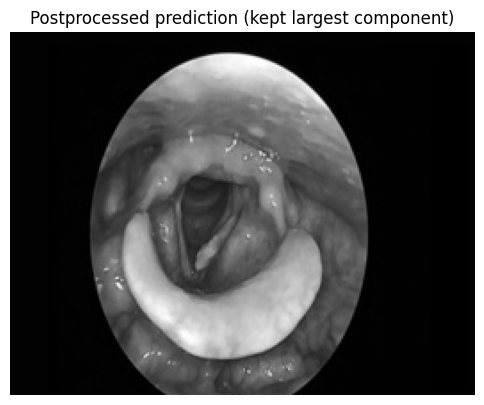

In [56]:
import numpy as np
from pathlib import Path
import nibabel as nib
import cv2
import matplotlib.pyplot as plt

PRED = Path("/kaggle/working/single_case_pred/case_doc.nii")
IMG  = Path("/kaggle/working/single_case_infer/imagesTs/case_doc_0000.nii")

pred = np.squeeze(nib.load(str(PRED)).get_fdata())
img  = np.squeeze(nib.load(str(IMG)).get_fdata())

mask = (pred > 0.5).astype(np.uint8)

# --- postprocess: small blobs temizle + sadece en büyük komponenti tut ---
num, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
# stats: [label_id][area] vs
min_area = 500  # bunu görüntüye göre 200-2000 arası deneyebilirsin
clean = np.zeros_like(mask)

if num > 1:
    # background=0, components 1..num-1
    areas = stats[1:, cv2.CC_STAT_AREA]
    best_idx = 1 + int(np.argmax(areas))
    if stats[best_idx, cv2.CC_STAT_AREA] >= min_area:
        clean[labels == best_idx] = 1

# metrikler
A = int(clean.sum())

def pca_length(binary_mask):
    ys, xs = np.where(binary_mask > 0)
    if len(xs) < 10:
        return 0.0
    pts = np.stack([xs, ys], axis=1).astype(np.float64)
    pts -= pts.mean(axis=0, keepdims=True)
    cov = np.cov(pts.T)
    vals, vecs = np.linalg.eigh(cov)
    v = vecs[:, np.argmax(vals)]
    proj = pts @ v
    return float(proj.max() - proj.min())

L = pca_length(clean)
Norm = A / (L**2 + 1e-8) if L > 0 else 0.0

print("=== POSTPROCESSED RESULTS ===")
print("A(px^2):", A)
print("L(px):", L)
print("A/L^2:", Norm)

# overlay
x = img.astype(np.float32)
x = (x - x.min()) / (x.max() - x.min() + 1e-8)
gray8 = (x * 255).astype(np.uint8)
base = cv2.cvtColor(gray8, cv2.COLOR_GRAY2BGR)

cnts, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
overlay = base.copy()
cv2.drawContours(overlay, cnts, -1, (0,255,255), 2)

out = Path("/kaggle/working/doctor_overlay_postprocessed.png")
cv2.imwrite(str(out), overlay)
print("Saved:", out)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Postprocessed prediction (kept largest component)")
plt.show()


In [57]:
from pathlib import Path
import numpy as np
import nibabel as nib
import cv2

# Orijinal jpg
jpg_dir = Path("/kaggle/input/denemergb")
img_file = sorted(list(jpg_dir.glob("*.jpg")) + list(jpg_dir.glob("*.jpeg")) + list(jpg_dir.glob("*.png")))[0]
bgr = cv2.imread(str(img_file), cv2.IMREAD_COLOR)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# 1) Siyah border'ı atmak için threshold ile ROI maskesi
_, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
th = cv2.medianBlur(th, 5)

# 2) En büyük konturu al (oval görüş alanı)
cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(cnt)

# Çok az margin ekle
pad = 5
x0 = max(x-pad, 0); y0 = max(y-pad, 0)
x1 = min(x+w+pad, gray.shape[1]); y1 = min(y+h+pad, gray.shape[0])

crop = gray[y0:y1, x0:x1]

# 3) CLAHE ile kontrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
crop_eq = clahe.apply(crop)

# 4) nnU-Net input olarak kaydet
arr = crop_eq.astype(np.float32)[..., None]  # (H,W,1)

out_ds = Path("/kaggle/working/single_case_infer_roi")
in_dir = out_ds / "imagesTs"
in_dir.mkdir(parents=True, exist_ok=True)

case_id = "case_doc_0000"
nii_path = in_dir / f"{case_id}.nii"
nib.save(nib.Nifti1Image(arr, affine=np.eye(4)), str(nii_path))

print("Saved ROI+CLAHE NIfTI:", nii_path, "shape:", arr.shape)


Saved ROI+CLAHE NIfTI: /kaggle/working/single_case_infer_roi/imagesTs/case_doc_0000.nii shape: (197, 167, 1)


In [58]:
!nnUNetv2_predict \
  -i /kaggle/working/single_case_infer_roi/imagesTs \
  -o /kaggle/working/single_case_pred_roi \
  -d 102 -c 2d -f 0 \
  -chk checkpoint_best.pth



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting case_doc:
perform_everything_on_device: True
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]
sending off prediction to background worker for resampling and export
done with case_doc


=== ROI+CLAHE RESULTS ===
A(px^2): 85
L(px): 40.04320940112099
A/L^2: 0.0530104107363566
Saved: /kaggle/working/doctor_overlay_roi.png


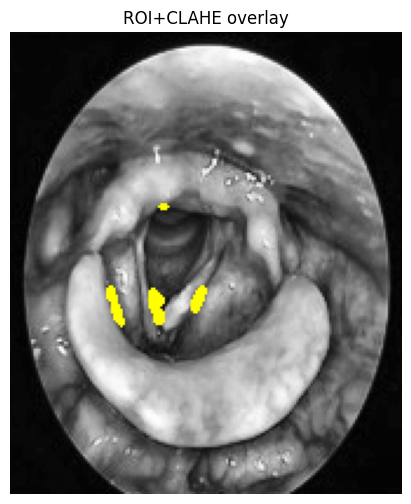

In [59]:
from pathlib import Path
import numpy as np
import nibabel as nib
import cv2
import matplotlib.pyplot as plt

PRED_DIR = Path("/kaggle/working/single_case_pred_roi")
IN_DIR   = Path("/kaggle/working/single_case_infer_roi/imagesTs")

pred_path = sorted(list(PRED_DIR.glob("*.nii")) + list(PRED_DIR.glob("*.nii.gz")))[0]
img_path  = sorted(list(IN_DIR.glob("*.nii")) + list(IN_DIR.glob("*.nii.gz")))[0]

pred = np.squeeze(nib.load(str(pred_path)).get_fdata())
img  = np.squeeze(nib.load(str(img_path)).get_fdata())
mask = (pred > 0.5).astype(np.uint8)

A = int(mask.sum())

def pca_length(binary_mask):
    ys, xs = np.where(binary_mask > 0)
    if len(xs) < 10:
        return 0.0
    pts = np.stack([xs, ys], axis=1).astype(np.float64)
    pts -= pts.mean(axis=0, keepdims=True)
    cov = np.cov(pts.T)
    vals, vecs = np.linalg.eigh(cov)
    v = vecs[:, np.argmax(vals)]
    proj = pts @ v
    return float(proj.max() - proj.min())

L = pca_length(mask)
Norm = A / (L**2 + 1e-8) if L > 0 else 0.0

print("=== ROI+CLAHE RESULTS ===")
print("A(px^2):", A)
print("L(px):", L)
print("A/L^2:", Norm)

# overlay
x = img.astype(np.float32)
x = (x - x.min()) / (x.max() - x.min() + 1e-8)
gray8 = (x * 255).astype(np.uint8)
base = cv2.cvtColor(gray8, cv2.COLOR_GRAY2BGR)

cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
overlay = base.copy()
# kırmızı maske
alpha = 0.35
red = np.zeros_like(base); red[...,2]=255
overlay[mask==1] = (overlay[mask==1]*(1-alpha) + red[mask==1]*alpha).astype(np.uint8)
# sarı kontur
cv2.drawContours(overlay, cnts, -1, (0,255,255), 2)

out = Path("/kaggle/working/doctor_overlay_roi.png")
cv2.imwrite(str(out), overlay)
print("Saved:", out)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("ROI+CLAHE overlay")
plt.show()


In [61]:
from pathlib import Path
import numpy as np
import nibabel as nib
import cv2

# Yeni doktor dataseti (input)
jpg_dir = Path("/kaggle/input/doktordeneme")
jpg_files = sorted(list(jpg_dir.glob("*.jpg")) + list(jpg_dir.glob("*.jpeg")) + list(jpg_dir.glob("*.png")))
assert len(jpg_files) > 0, f"{jpg_dir} içinde jpg/png yok."

img_file = jpg_files[0]
print("Using image:", img_file.name)

bgr = cv2.imread(str(img_file), cv2.IMREAD_COLOR)
assert bgr is not None, "Görüntü okunamadı."
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# ROI maskesi (siyah border at)
_, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
th = cv2.medianBlur(th, 5)

cnts, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(cnts) == 0:
    # ROI bulunamazsa full image kullan
    crop = gray
    print("ROI not found -> using full image")
else:
    cnt = max(cnts, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(cnt)
    pad = 5
    x0 = max(x-pad, 0); y0 = max(y-pad, 0)
    x1 = min(x+w+pad, gray.shape[1]); y1 = min(y+h+pad, gray.shape[0])
    crop = gray[y0:y1, x0:x1]
    print("ROI crop:", (y0,y1,x0,x1), "shape:", crop.shape)

# CLAHE kontrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
crop_eq = clahe.apply(crop)

# nnU-Net input (H,W,1)
arr = crop_eq.astype(np.float32)[..., None]

out_ds = Path("/kaggle/working/single_case_infer_roi2")
in_dir = out_ds / "imagesTs"
in_dir.mkdir(parents=True, exist_ok=True)

case_id = "case_doc2_0000"
nii_path = in_dir / f"{case_id}.nii"
nib.save(nib.Nifti1Image(arr, affine=np.eye(4)), str(nii_path))

print("Saved NIfTI:", nii_path, "shape:", arr.shape)


Using image: reinke-odemi.jpg
ROI crop: (0, 540, 0, 720) shape: (540, 720)
Saved NIfTI: /kaggle/working/single_case_infer_roi2/imagesTs/case_doc2_0000.nii shape: (540, 720, 1)


In [62]:
!nnUNetv2_predict \
  -i /kaggle/working/single_case_infer_roi2/imagesTs \
  -o /kaggle/working/single_case_pred_roi2 \
  -d 102 -c 2d -f 0 \
  -chk checkpoint_best.pth



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting case_doc2:
perform_everything_on_device: True
100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  6.90it/s]
sending off prediction to background worker for resampling and export
done with case_doc2


=== DOCTOR IMAGE #2 RESULTS ===
A(px^2): 3102
L(px): 209.45739158287515
A/L^2: 0.07070504642038451
Saved overlay: /kaggle/working/doctor2_overlay_roi.png


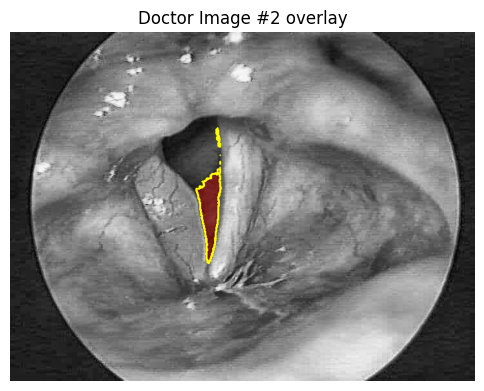

In [63]:
from pathlib import Path
import numpy as np
import nibabel as nib
import cv2
import matplotlib.pyplot as plt

PRED_DIR = Path("/kaggle/working/single_case_pred_roi2")
IN_DIR   = Path("/kaggle/working/single_case_infer_roi2/imagesTs")

pred_path = sorted(list(PRED_DIR.glob("*.nii")) + list(PRED_DIR.glob("*.nii.gz")))[0]
img_path  = sorted(list(IN_DIR.glob("*.nii")) + list(IN_DIR.glob("*.nii.gz")))[0]

pred = np.squeeze(nib.load(str(pred_path)).get_fdata())
img  = np.squeeze(nib.load(str(img_path)).get_fdata())
mask = (pred > 0.5).astype(np.uint8)

A = int(mask.sum())

def pca_length(binary_mask):
    ys, xs = np.where(binary_mask > 0)
    if len(xs) < 10:
        return 0.0
    pts = np.stack([xs, ys], axis=1).astype(np.float64)
    pts -= pts.mean(axis=0, keepdims=True)
    cov = np.cov(pts.T)
    vals, vecs = np.linalg.eigh(cov)
    v = vecs[:, np.argmax(vals)]
    proj = pts @ v
    return float(proj.max() - proj.min())

L = pca_length(mask)
Norm = A / (L**2 + 1e-8) if L > 0 else 0.0

print("=== DOCTOR IMAGE #2 RESULTS ===")
print("A(px^2):", A)
print("L(px):", L)
print("A/L^2:", Norm)

# overlay
x = img.astype(np.float32)
x = (x - x.min()) / (x.max() - x.min() + 1e-8)
gray8 = (x * 255).astype(np.uint8)
base = cv2.cvtColor(gray8, cv2.COLOR_GRAY2BGR)

alpha = 0.35
red = np.zeros_like(base); red[...,2]=255
overlay = base.copy()
overlay[mask==1] = (overlay[mask==1]*(1-alpha) + red[mask==1]*alpha).astype(np.uint8)

cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(overlay, cnts, -1, (0,255,255), 2)

out = Path("/kaggle/working/doctor2_overlay_roi.png")
cv2.imwrite(str(out), overlay)
print("Saved overlay:", out)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Doctor Image #2 overlay")
plt.show()


thr=0.5  A=3106  L=157.40  A/L^2=0.125366  saved=doctor2_overlay_thr0p5.png


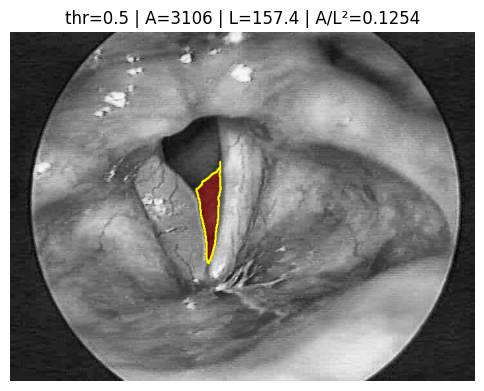

thr=0.35  A=3106  L=157.40  A/L^2=0.125366  saved=doctor2_overlay_thr0p35.png


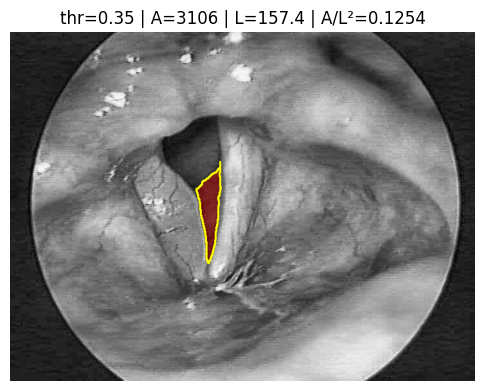

thr=0.25  A=3106  L=157.40  A/L^2=0.125366  saved=doctor2_overlay_thr0p25.png


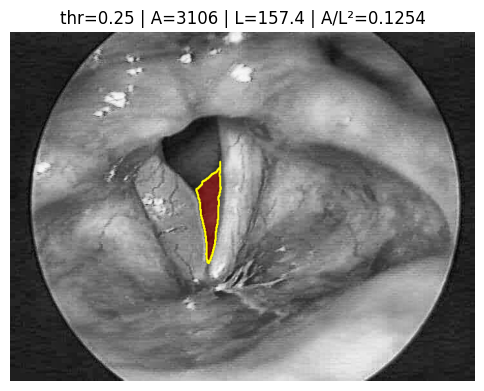

In [64]:
import numpy as np
from pathlib import Path
import nibabel as nib
import cv2
import matplotlib.pyplot as plt

PRED = Path("/kaggle/working/single_case_pred_roi2")  # pred klasörü
INN  = Path("/kaggle/working/single_case_infer_roi2/imagesTs")

pred_path = sorted(list(PRED.glob("*.nii")) + list(PRED.glob("*.nii.gz")))[0]
img_path  = sorted(list(INN.glob("*.nii")) + list(INN.glob("*.nii.gz")))[0]

pred = np.squeeze(nib.load(str(pred_path)).get_fdata()).astype(np.float32)
img  = np.squeeze(nib.load(str(img_path)).get_fdata()).astype(np.float32)

def pca_length(mask):
    ys, xs = np.where(mask > 0)
    if len(xs) < 10:
        return 0.0
    pts = np.stack([xs, ys], axis=1).astype(np.float64)
    pts -= pts.mean(axis=0, keepdims=True)
    cov = np.cov(pts.T)
    vals, vecs = np.linalg.eigh(cov)
    v = vecs[:, np.argmax(vals)]
    proj = pts @ v
    return float(proj.max() - proj.min())

# base görüntü
x = (img - img.min()) / (img.max() - img.min() + 1e-8)
gray8 = (x * 255).astype(np.uint8)
base = cv2.cvtColor(gray8, cv2.COLOR_GRAY2BGR)

thresholds = [0.50, 0.35, 0.25]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))

for t in thresholds:
    m = (pred > t).astype(np.uint8)

    # morphology: close (şekli toparla)
    m = cv2.morphologyEx(m, cv2.MORPH_CLOSE, kernel, iterations=2)

    # largest component
    num, lab, stats, _ = cv2.connectedComponentsWithStats(m, connectivity=8)
    clean = np.zeros_like(m)
    if num > 1:
        areas = stats[1:, cv2.CC_STAT_AREA]
        best = 1 + int(np.argmax(areas))
        clean[lab == best] = 1

    A = int(clean.sum())
    L = pca_length(clean)
    Norm = A/(L**2+1e-8) if L>0 else 0.0

    overlay = base.copy()
    alpha = 0.35
    red = np.zeros_like(base); red[...,2]=255
    overlay[clean==1] = (overlay[clean==1]*(1-alpha) + red[clean==1]*alpha).astype(np.uint8)
    cnts, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(overlay, cnts, -1, (0,255,255), 2)

    out = Path(f"/kaggle/working/doctor2_overlay_thr{str(t).replace('.','p')}.png")
    cv2.imwrite(str(out), overlay)

    print(f"thr={t}  A={A}  L={L:.2f}  A/L^2={Norm:.6f}  saved={out.name}")

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"thr={t} | A={A} | L={L:.1f} | A/L²={Norm:.4f}")
    plt.show()


In [65]:
!zip all_pngs.zip /kaggle/working/*.png


  adding: kaggle/working/doctor2_overlay_roi.png (deflated 19%)
  adding: kaggle/working/doctor2_overlay_thr0p25.png (deflated 19%)
  adding: kaggle/working/doctor2_overlay_thr0p35.png (deflated 19%)
  adding: kaggle/working/doctor2_overlay_thr0p5.png (deflated 19%)
  adding: kaggle/working/doctor_overlay_contour.png (deflated 15%)
  adding: kaggle/working/doctor_overlay_mask.png (deflated 15%)
  adding: kaggle/working/doctor_overlay.png (deflated 15%)
  adding: kaggle/working/doctor_overlay_postprocessed.png (deflated 15%)
  adding: kaggle/working/doctor_overlay_roi.png (deflated 13%)
  adding: kaggle/working/normalized_area_comparison.png (deflated 16%)
  adding: kaggle/working/pixel_area_comparison.png (deflated 19%)


In [67]:
import time, sys, datetime

while True:
    sys.stdout.write(f"\ralive: {datetime.datetime.now().strftime('%H:%M:%S')}")
    sys.stdout.flush()
    time.sleep(30)


alive: 11:36:55

KeyboardInterrupt: 

In [68]:
from pathlib import Path
import numpy as np
import pandas as pd
import nibabel as nib
from scipy.ndimage import binary_erosion, distance_transform_edt

# =========================
# 0) PATHS (gerekirse düzelt)
# =========================
GT_ROOT_CANDIDATES = [
    Path("/kaggle/working/Test50_fixed3d/labelsTs"),
    Path("/kaggle/working/Test50_fixed3d/labelsTr"),
    Path("/kaggle/input/testing/nnUNet_raw/Dataset102_BAGLS2D_TEST50/labelsTs"),
    Path("/kaggle/input/testing/nnUNet_raw/Dataset102_BAGLS2D_TEST50/labelsTr"),
]
PRED_ROOT_CANDIDATES = [
    Path("/kaggle/working/preds_test50"),
    Path("/kaggle/working/preds_test50_fixed"),
    Path("/kaggle/working/preds_test50_roi"),
    Path("/kaggle/working/preds_test50_3d"),
]

def first_existing(paths):
    for p in paths:
        if p.exists():
            return p
    return None

GT_DIR = first_existing(GT_ROOT_CANDIDATES)
PRED_DIR = first_existing(PRED_ROOT_CANDIDATES)

assert GT_DIR is not None, f"GT folder bulunamadı. Adaylar: {GT_ROOT_CANDIDATES}"
assert PRED_DIR is not None, f"Pred folder bulunamadı. Adaylar: {PRED_ROOT_CANDIDATES}"

print("GT_DIR  :", GT_DIR)
print("PRED_DIR:", PRED_DIR)

# =========================
# 1) NIfTI okuma yardımcıları
# =========================
def load_nii(path: Path):
    nii = nib.load(str(path))
    arr = nii.get_fdata()
    arr = np.squeeze(arr)
    # label bazen float gelir; binary yapacağız
    return arr, nii.header.get_zooms()

def to_binary(arr):
    # nnU-Net pred bazen 0/1, bazen label integer, bazen prob -> threshold
    if arr.dtype.kind in ("f", "c"):
        return (arr > 0.5).astype(np.uint8)
    else:
        return (arr > 0).astype(np.uint8)

# =========================
# 2) Boundary metrikleri: HD95 + ASD
# =========================
def surface_mask(bin_mask: np.ndarray):
    # 2D/3D destekler, ama bizim case 2D (H,W)
    if bin_mask.ndim == 2:
        struct = np.ones((3,3), dtype=bool)
    else:
        struct = np.ones((3,3,3), dtype=bool)
    er = binary_erosion(bin_mask.astype(bool), structure=struct, border_value=0)
    surf = bin_mask.astype(bool) & (~er)
    return surf

def surface_distances(a: np.ndarray, b: np.ndarray, spacing):
    """
    a,b binary masks. returns distances from surface(a) to surface(b).
    spacing: tuple voxel spacing (len=ndim)
    """
    sa = surface_mask(a)
    sb = surface_mask(b)

    # Eğer sb boşsa distance_transform anlamsız
    if sb.sum() == 0 or sa.sum() == 0:
        return np.array([], dtype=np.float32)

    # distance_transform_edt: True/1 olan yerlere değil, 0 olan yerlere mesafe hesaplar
    # surface(b)'ye mesafe için, sb'nin tersine EDT uygula.
    dt = distance_transform_edt(~sb, sampling=spacing[:sb.ndim])
    return dt[sa].astype(np.float32)

def hd95_asd(gt: np.ndarray, pr: np.ndarray, spacing):
    """
    Symmetric HD95 and ASD.
    """
    gt = gt.astype(np.uint8)
    pr = pr.astype(np.uint8)

    gt_sum = int(gt.sum())
    pr_sum = int(pr.sum())

    # Empty cases handling:
    if gt_sum == 0 and pr_sum == 0:
        return 0.0, 0.0  # perfect empty agreement
    if gt_sum == 0 and pr_sum > 0:
        return np.nan, np.nan  # false positive only (boundary distance not meaningful)
    if gt_sum > 0 and pr_sum == 0:
        return np.nan, np.nan  # missed detection (boundary distance not meaningful)

    d_gt_pr = surface_distances(gt, pr, spacing)
    d_pr_gt = surface_distances(pr, gt, spacing)

    if len(d_gt_pr) == 0 or len(d_pr_gt) == 0:
        return np.nan, np.nan

    all_d = np.concatenate([d_gt_pr, d_pr_gt])
    hd95 = float(np.percentile(all_d, 95))
    asd  = float(all_d.mean())
    return hd95, asd

# =========================
# 3) Dice/IoU + failure category
# =========================
def dice_iou(gt: np.ndarray, pr: np.ndarray):
    gt = gt.astype(bool); pr = pr.astype(bool)
    g = gt.sum(); p = pr.sum()
    if g == 0 and p == 0:
        return 1.0, 1.0  # empty-empty agreement
    inter = (gt & pr).sum()
    union = (gt | pr).sum()
    dice = (2.0 * inter) / (g + p + 1e-8)
    iou  = inter / (union + 1e-8)
    return float(dice), float(iou)

def classify_case(gt_sum, pr_sum, dice):
    if gt_sum == 0 and pr_sum == 0:
        return "TN_empty"          # doğru negatif
    if gt_sum == 0 and pr_sum > 0:
        return "FP_only"           # false positive
    if gt_sum > 0 and pr_sum == 0:
        return "FN_only"           # tamamen kaçırmış
    if dice < 0.1:
        return "failure_low_dice"  # çok kötü
    return "ok"

# =========================
# 4) Dosyaları eşleştir
# =========================
gt_files = sorted(list(GT_DIR.glob("*.nii")) + list(GT_DIR.glob("*.nii.gz")))
pred_files = sorted(list(PRED_DIR.glob("*.nii")) + list(PRED_DIR.glob("*.nii.gz")))

assert len(gt_files) > 0, "GT .nii bulunamadı."
assert len(pred_files) > 0, "Pred .nii bulunamadı."

gt_map = {f.stem.replace(".nii",""): f for f in gt_files}
pred_map = {f.stem.replace(".nii",""): f for f in pred_files}

common = sorted(set(gt_map.keys()) & set(pred_map.keys()))
print("GT count   :", len(gt_files))
print("Pred count :", len(pred_files))
print("Common     :", len(common))

assert len(common) > 0, "GT ve Pred dosya isimleri kesişmiyor. (case_XXXX uyuşmuyor olabilir)"

# =========================
# 5) Hesapla
# =========================
rows = []
for k in common:
    gt_arr, gt_spacing = load_nii(gt_map[k])
    pr_arr, pr_spacing = load_nii(pred_map[k])

    gt_bin = to_binary(gt_arr)
    pr_bin = to_binary(pr_arr)

    # spacing: GT'den al (bizim test setlerde genelde 1,1)
    spacing = gt_spacing
    if len(spacing) < gt_bin.ndim:
        spacing = tuple([1.0]*gt_bin.ndim)

    dsc, iou = dice_iou(gt_bin, pr_bin)

    gt_sum = int(gt_bin.sum())
    pr_sum = int(pr_bin.sum())

    hd95, asd = hd95_asd(gt_bin, pr_bin, spacing)

    cat = classify_case(gt_sum, pr_sum, dsc)

    rows.append({
        "case": k,
        "dice": dsc,
        "iou": iou,
        "A_gt_px2": gt_sum,
        "A_pred_px2": pr_sum,
        "HD95": hd95,
        "ASD": asd,
        "category": cat
    })

df = pd.DataFrame(rows).sort_values("case").reset_index(drop=True)

out_csv = Path("/kaggle/working/boundary_metrics_test50.csv")
df.to_csv(out_csv, index=False)
print("Saved CSV:", out_csv)

# =========================
# 6) Özet + Failure rate
# =========================
total = len(df)
fail_low = int((df["category"] == "failure_low_dice").sum())
fp_only  = int((df["category"] == "FP_only").sum())
fn_only  = int((df["category"] == "FN_only").sum())
tn_empty = int((df["category"] == "TN_empty").sum())
ok       = int((df["category"] == "ok").sum())

print("\n=== COUNTS ===")
print("Total:", total)
print("OK:", ok)
print("TN_empty:", tn_empty)
print("FP_only:", fp_only)
print("FN_only:", fn_only)
print("failure_low_dice:", fail_low)

failure_rate = (fail_low + fp_only + fn_only) / max(total,1)
print("\nFailure rate (FP_only + FN_only + low_dice):", failure_rate)

# HD95/ASD özet (nan olanlar çıkar)
summary = df[["dice","iou","HD95","ASD"]].agg(["mean","std","median"])
print("\n=== SUMMARY (including TN_empty dice=1, nan HD/ASD skipped in mean) ===")
display(summary)

# İstersen sadece pozitif GT (A_gt>0) için özet:
pos = df[df["A_gt_px2"] > 0].copy()
summary_pos = pos[["dice","iou","HD95","ASD"]].agg(["mean","std","median"])
print("\n=== SUMMARY (POSITIVE GT ONLY) ===")
display(summary_pos)


GT_DIR  : /kaggle/working/Test50_fixed3d/labelsTs
PRED_DIR: /kaggle/working/preds_test50
GT count   : 50
Pred count : 50
Common     : 50
Saved CSV: /kaggle/working/boundary_metrics_test50.csv

=== COUNTS ===
Total: 50
OK: 42
TN_empty: 7
FP_only: 1
FN_only: 0
failure_low_dice: 0

Failure rate (FP_only + FN_only + low_dice): 0.02

=== SUMMARY (including TN_empty dice=1, nan HD/ASD skipped in mean) ===


,dice,iou,HD95,ASD
mean,0.885506,0.817615,4.697115,0.811059
std,0.153100,0.177743,13.291754,1.394582
median,0.918198,0.848767,1.414214,0.461982



=== SUMMARY (POSITIVE GT ONLY) ===


,dice,iou,HD95,ASD
mean,0.887507,0.806685,5.479968,0.946235
std,0.081524,0.125103,14.228119,1.464882
median,0.902881,0.822966,1.414214,0.551561
